# Titanic - Machine Learning from Disaster

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_data = pd.read_csv('../../data/train.csv')

In [4]:
print(train_data.shape)
train_data.sample(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
405,406,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,NaN,S
357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S
663,664,0,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
67,68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,NaN,S
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
654,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q


In [5]:
print(train_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
print(", ".join(train_data.columns))

PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked


In [7]:
#data cleaning & preprocessing 
train_data.drop(columns=['PassengerId'], inplace=True) #ця колонка точно не знадобиться

# Missing data

In [8]:
def get_null_counts(input_data):
    null_cols = input_data.columns[input_data.isnull().any()]

    null_counts = {}
    for col in null_cols:
        null_counts[col] = input_data[col].isnull().sum()

    null_counts = dict(sorted(null_counts.items(), key=lambda item: item[1]))

    return null_counts

def print_null_counts(null_counts, data_length):
    print("{:<35} {:<20} {:<10}".format('Column', 'Null Count', 'Null %'))
    print('-' * 70)
    for col, count in null_counts.items():
        null_percent = round(count / data_length * 100, 2)
        print("{:<35} {:<20} {:<10}%".format(col, count, null_percent))

In [9]:
null_counts = get_null_counts(train_data)
print_null_counts(null_counts, len(train_data))

Column                              Null Count           Null %    
----------------------------------------------------------------------
Embarked                            2                    0.22      %
Age                                 177                  19.87     %
Cabin                               687                  77.1      %


In [10]:
#видалимо стовпчики де багато пустих значень
columns_to_drop = []
for col, count in null_counts.items():
    if count > 278:
        columns_to_drop.append(col)
train_data.drop(columns=columns_to_drop, inplace=True)

In [11]:
null_counts = get_null_counts(train_data)
print_null_counts(null_counts, len(train_data))

Column                              Null Count           Null %    
----------------------------------------------------------------------
Embarked                            2                    0.22      %
Age                                 177                  19.87     %


In [12]:
for col, count in null_counts.items():
    print(f"Data type of column {col}: {train_data[col].dtype}")

Data type of column Embarked: object
Data type of column Age: float64


In [13]:
#видалимо рядки з пустими значеннями що лишилися
train_data.dropna(inplace=True)
null_counts = get_null_counts(train_data)
print_null_counts(null_counts, len(train_data))
train_data

Column                              Null Count           Null %    
----------------------------------------------------------------------


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Duplicates

In [14]:
train_data[train_data.duplicated()]#шукаємо дублікати

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


# Distribution

In [15]:
train_data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,712.000000,712.000000,712,712,712.000000,712.000000,712.000000,712,712.000000,712
unique,NaN,NaN,712,2,NaN,NaN,NaN,541,NaN,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,1,453,NaN,NaN,NaN,7,NaN,554
mean,0.404494,2.240169,NaN,NaN,29.642093,0.514045,0.432584,NaN,34.567251,NaN
std,0.491139,0.836854,NaN,NaN,14.492933,0.930692,0.854181,NaN,52.938648,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,0.000000,1.000000,NaN,NaN,20.000000,0.000000,0.000000,NaN,8.050000,NaN
50%,0.000000,2.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,15.645850,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,1.000000,NaN,33.000000,NaN


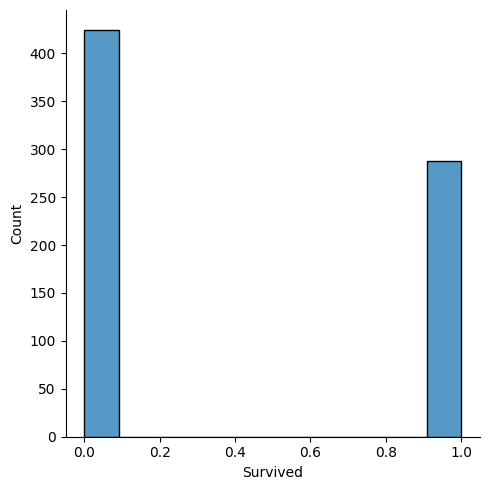

In [16]:
sns.displot(train_data['Survived'], kde=False)#дивимося розподіл значень TARGET. Очевидно дані незбалансовані

In [17]:
categorical_features = train_data.select_dtypes(exclude=['int64', 'float64']).columns 
print(categorical_features)

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


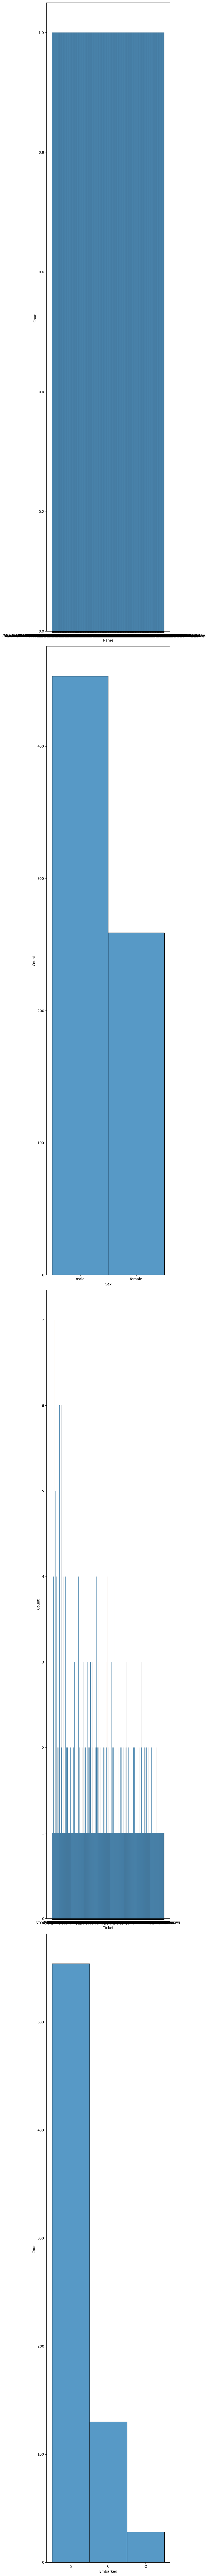

In [18]:
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(10, 30))
fig.set_size_inches(8,100)
for i, col in enumerate(categorical_features):#переглянемо розподіли всіх категоріальних фіч
    sns.histplot(train_data[col], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

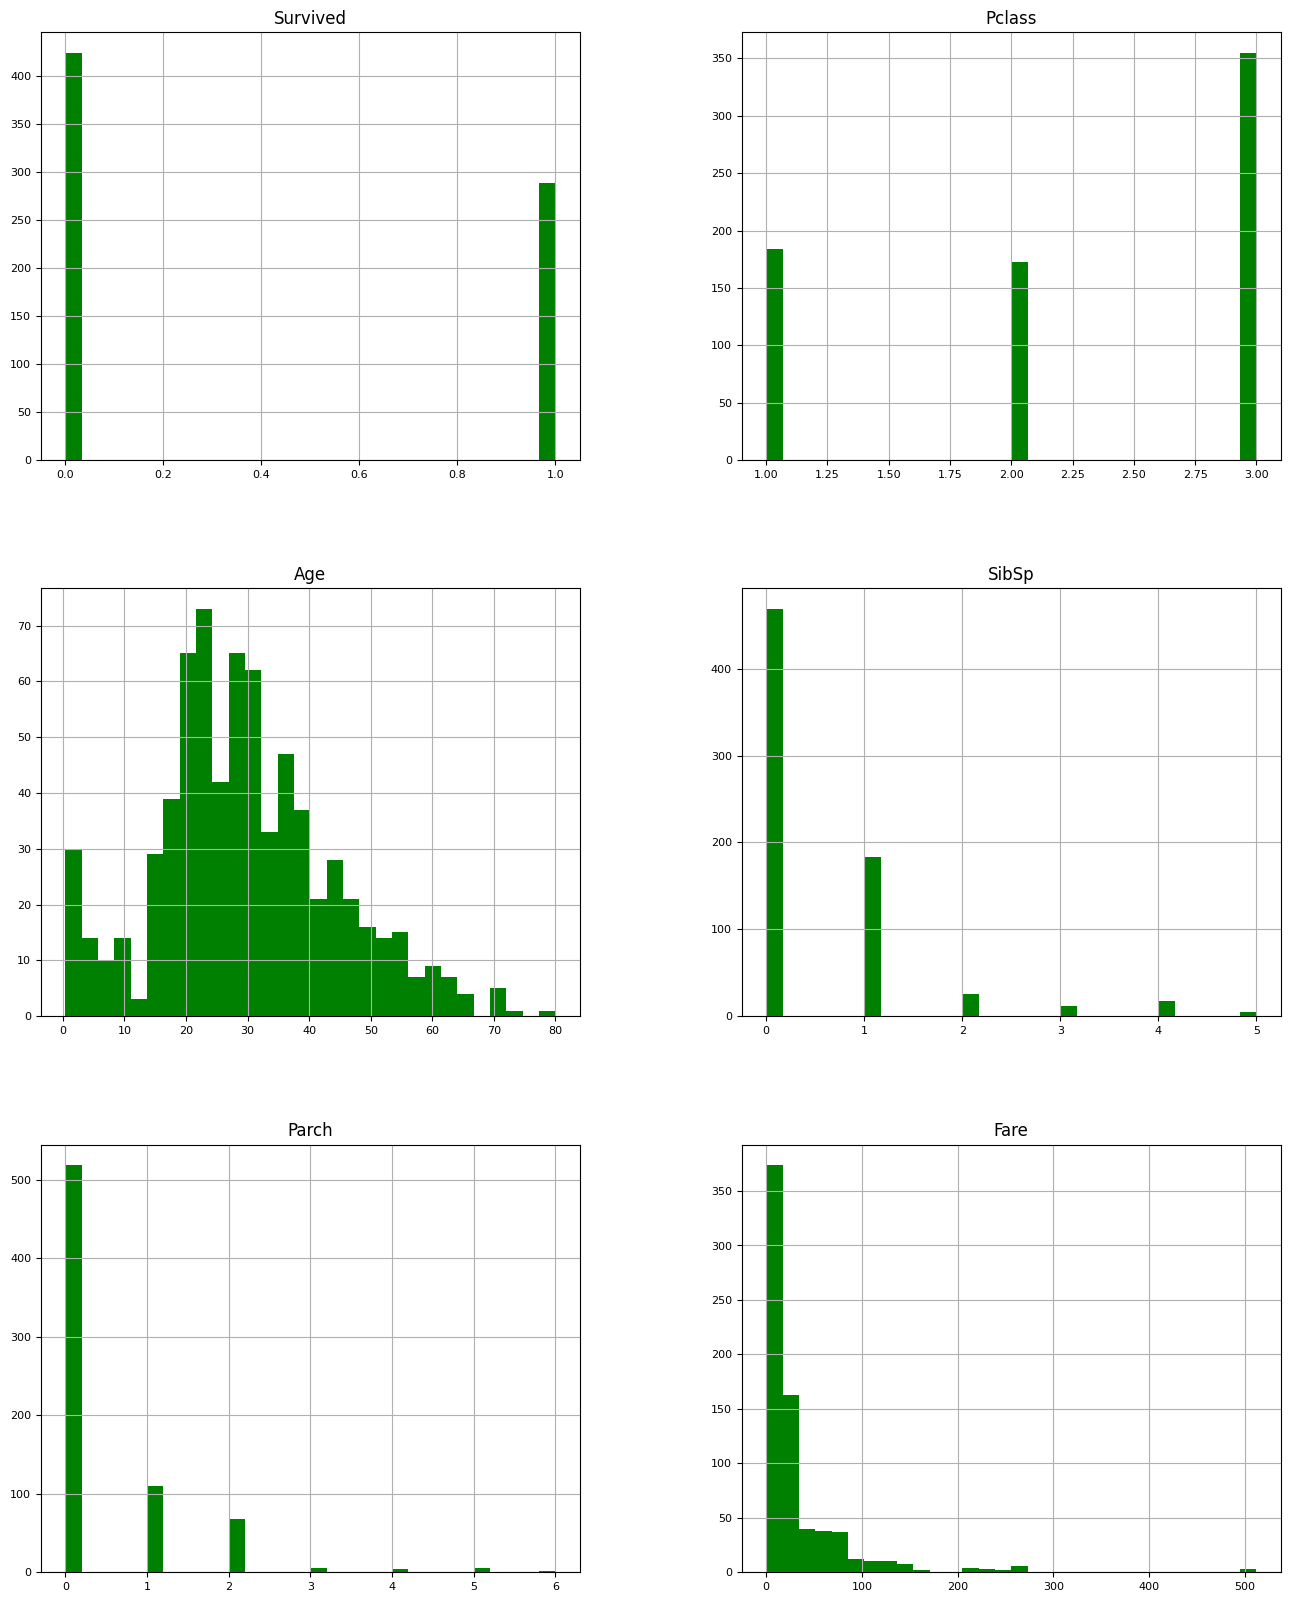

In [19]:
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns#тепер переглянемо розподіли числових фіч
train_data[numerical_features].hist(figsize = (16,20), color='g', bins=30, xlabelsize=8, ylabelsize=8)

In [20]:
train_data[numerical_features].median()

Survived     0.00000
Pclass       2.00000
Age         28.00000
SibSp        0.00000
Parch        0.00000
Fare        15.64585
dtype: float64

In [21]:
train_data[numerical_features].mean()

Survived     0.404494
Pclass       2.240169
Age         29.642093
SibSp        0.514045
Parch        0.432584
Fare        34.567251
dtype: float64

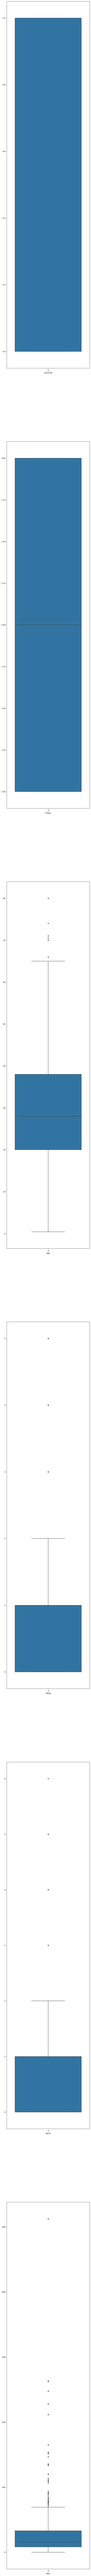

In [22]:
# outliers
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 30))
fig.set_size_inches(8,250)
for i, col in enumerate(numerical_features):
    sns.boxplot(train_data[col], ax=axes[i])
    axes[i].set_xlabel(col)
plt.show()

<Axes: >

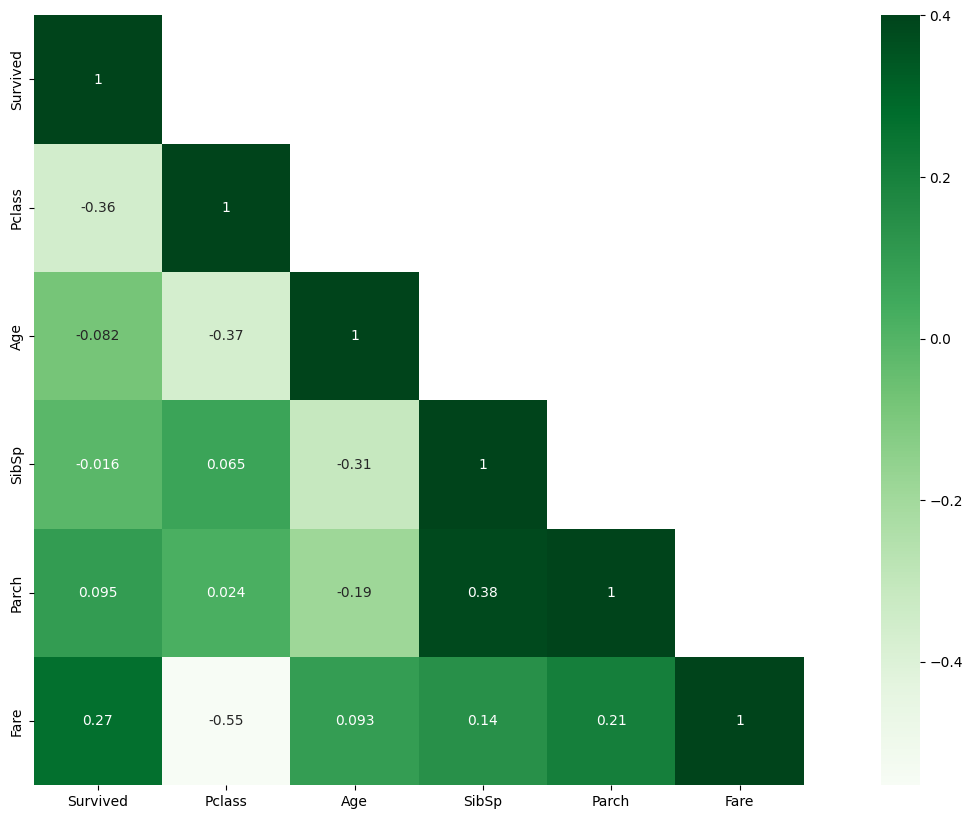

In [23]:
corrMatt = train_data[numerical_features].corr()#візуалізуємо кореляцію фіч один з одним
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, cmap="Greens", mask=mask, vmax=0.4, square=True, annot=True)

In [24]:
print(", ".join(train_data.columns))
print(train_data.dtypes)

Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked
Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object


In [25]:
#обираємо фічі які не сильно корелюються для тренування
features_for_training = ['Survived','Sex','Parch', 'Fare', 'Age']
categorical_training_columns = train_data[features_for_training].select_dtypes(exclude=['int64', 'float64']).columns
numerical_training_columns = train_data[features_for_training].select_dtypes(include=['int64', 'float64']).columns
print('categorical_training_columns: ', categorical_training_columns)
print('numerical_training_columns:',numerical_training_columns)

categorical_training_columns:  Index(['Sex'], dtype='object')
numerical_training_columns: Index(['Survived', 'Parch', 'Fare', 'Age'], dtype='object')


In [26]:
#виділяємо значення категоріальних фіч для подальшої обробки
for col in categorical_training_columns:
    un = train_data[col].unique()
    print(col, ': ',un)

Sex :  ['male' 'female']


In [27]:
numeric_representation = {#створюємо числову репрезентацію категоріальних значень фіч
    "Sex" : {'male':1, 'female':-1,}
}
# замінюємо категорії на числа
train_data.replace(numeric_representation, inplace=True)

# перевірка
print(train_data[categorical_training_columns].head())

   Sex
0    1
1   -1
2   -1
3   -1
4    1


In [28]:
train_data[categorical_training_columns].dtypes# перевірка

Sex    int64
dtype: object

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [30]:
selected_train_data = train_data[features_for_training]
selected_train_data

,Survived,Sex,Parch,Fare,Age
0,0,1,0,7.2500,22.0
1,1,-1,0,71.2833,38.0
2,1,-1,0,7.9250,26.0
3,1,-1,0,53.1000,35.0
4,0,1,0,8.0500,35.0
...,...,...,...,...,...
885,0,-1,5,29.1250,39.0
886,0,1,0,13.0000,27.0
887,1,-1,0,30.0000,19.0
889,1,1,0,30.0000,26.0


In [31]:
train_data_for_classification = selected_train_data.drop("Survived", axis=1)
features_for_training.remove("Survived")

# EDA for test data

In [33]:
#підготуємо тестові дані так само як і для тренування
test_data = pd.read_csv('../../data/test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [34]:
test_data = test_data[features_for_training]

In [35]:
null_counts = get_null_counts(test_data)
print_null_counts(null_counts, len(test_data))

Column                              Null Count           Null %    
----------------------------------------------------------------------
Fare                                1                    0.24      %
Age                                 86                   20.57     %


In [36]:
test_data.replace(numeric_representation, inplace=True)
test_data

C:\Users\stern\AppData\Local\Temp\ipykernel_16708\14680988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.replace(numeric_representation, inplace=True)


,Sex,Parch,Fare,Age
0,1,0,7.8292,34.5
1,-1,0,7.0000,47.0
2,1,0,9.6875,62.0
3,1,0,8.6625,27.0
4,-1,1,12.2875,22.0
...,...,...,...,...
413,1,0,8.0500,NaN
414,-1,0,108.9000,39.0
415,1,0,7.2500,38.5
416,1,0,8.0500,NaN


# Classification

In [37]:
from sklearn.metrics import roc_auc_score
import time

In [46]:
# Розділимо дані на набори для тренувань і валідації
X_train, X_val, y_train, y_val = train_test_split(train_data_for_classification, train_data['Survived'], test_size=0.2)
start_time = time.time()
# створення моделі
lr_model = SGDClassifier()
lr_model.fit(X_train, y_train)

end_time = time.time()
train_time = end_time - start_time
start_time = time.time()
# робимо "передбачення"
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)

# Точність на тренувальних даних
print("Training Data:")
print("Accuracy: {:.4f}".format(accuracy_score(y_train, y_train_pred)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_train, y_train_pred)))

# Точність на валідаційних даних
print("\nValidation Data:")
print("Accuracy: {:.4f}".format(accuracy_score(y_val, y_val_pred)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_val, y_val_pred)))

# End measuring time
end_time = time.time()

# Calculate and print execution time
execution_time = end_time - start_time
print(f"Training time in milliseconds: {train_time * 1000}")
print(f"Execution time in milliseconds: {execution_time * 1000}")

Training Data:
Accuracy: 0.7750
ROC AUC Score: 0.7730

Validation Data:
Accuracy: 0.7203
ROC AUC Score: 0.7024
Training time in milliseconds: 3.0281543731689453
Execution time in milliseconds: 5.063295364379883


In [37]:
null_counts = get_null_counts(test_data)
print_null_counts(null_counts, len(test_data))

# Calculate the mean of the 'Age' column
age_mean = test_data['Age'].mean()

# Replace NaN values in the 'Age' column with the calculated mean
test_data['Age'].fillna(age_mean, inplace=True)

# Calculate the mean of the 'Age' column
fare_mean = test_data['Fare'].mean()

# Replace NaN values in the 'Age' column with the calculated mean
test_data['Fare'].fillna(fare_mean, inplace=True)

null_counts = get_null_counts(test_data)
print_null_counts(null_counts, len(test_data))

Column                              Null Count           Null %    
----------------------------------------------------------------------
Fare                                1                    0.24      %
Age                                 86                   20.57     %
Column                              Null Count           Null %    
----------------------------------------------------------------------


C:\Users\stern\AppData\Local\Temp\ipykernel_13604\178260634.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Age'].fillna(age_mean, inplace=True)
C:\Users\stern\AppData\Local\Temp\ipykernel_13604\178260634.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Fare'].fillna(fare_mean, inplace=True)


In [38]:
y_test_pred = lr_model.predict(test_data)
y_test_pred#результат роботи моделі на тестових даних

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Save Result

In [39]:
origin_test_data = pd.read_csv('../../../data/test.csv')

# створення датафрейму з SK_ID_CURR та передбаченими TARGET
result = pd.DataFrame({'PassengerId': origin_test_data['PassengerId'], 'Survived': y_test_pred})

#зберігаємо результат
result.to_csv('../../../data/python_result.csv', index=False)

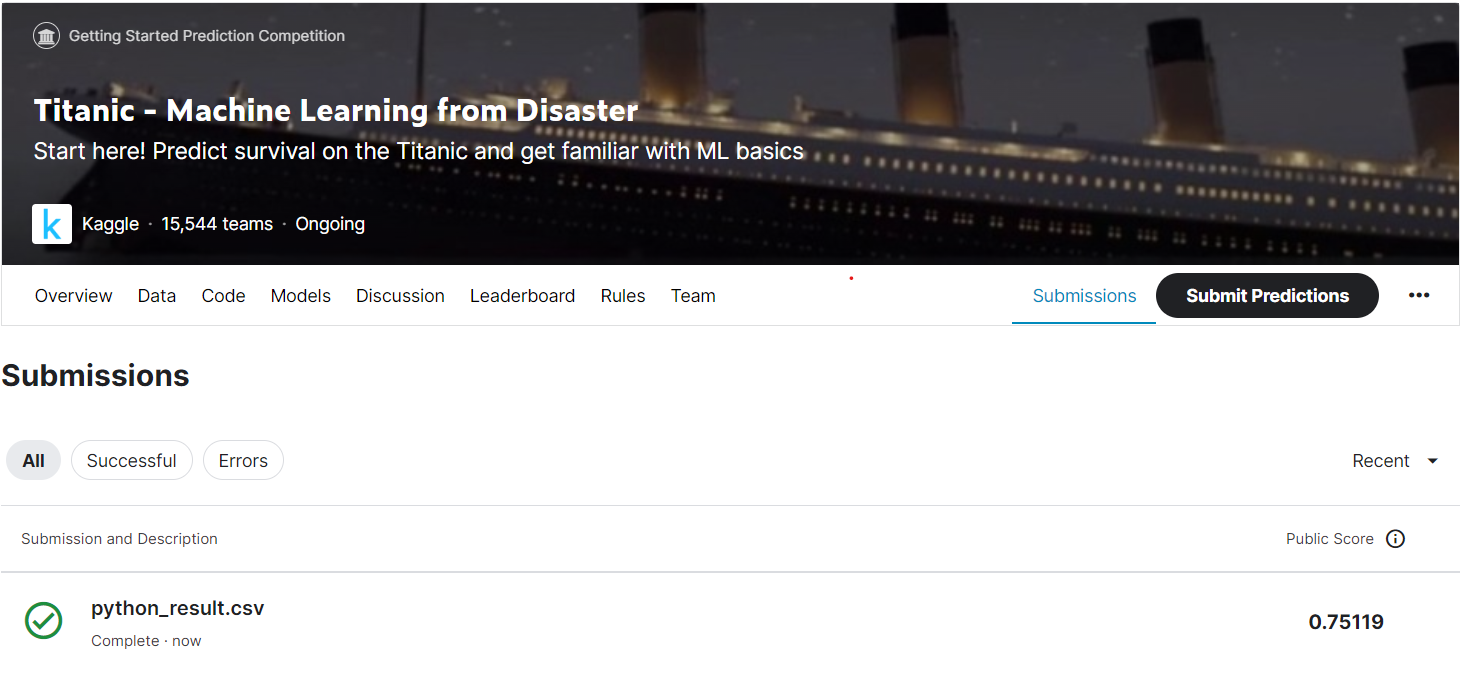

In [40]:
from IPython.display import Image

Image(filename='Screenshot.png')

In [41]:
features_for_training2 = features_for_training.copy()
features_for_training2.append('Survived')
train_data[features_for_training2].to_csv('../../../data/prepared_train_data.csv')
test_data[features_for_training].to_csv('../../../data/prepared_test_data.csv')